In [1]:
!pip install kneed

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import plotly.express as px
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data

In [3]:
data=pd.read_csv('../input/iris-data/Iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Removing id from the data
data.drop('Id',axis=1,inplace=True)

# Target Distribution in the data

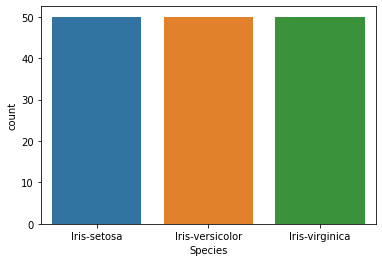

In [8]:
sns.countplot(x=data['Species']);

# Function to get the best K

In [9]:
# Function to get the best k 
def get_k(arr,print_plot=False):
    wcss=[]
    for i in range(1,11):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(arr)
        wcss.append(kmeans.inertia_)
    x=[i for i in range(1,11)]
    kn = KneeLocator(x, wcss, curve='convex', direction='decreasing')
    if print_plot==True:
        plt.xlabel('number of clusters k')
        plt.ylabel('Sum of squared distances')
        plt.plot(x, wcss, 'rx-')
        plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
        plt.show()
        print('The elbow is formed at :',kn.knee)
    else:
        return kn.knee

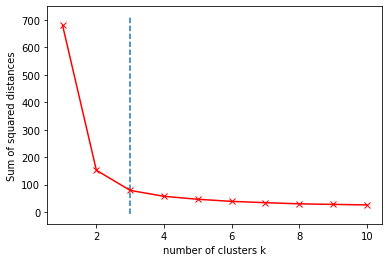

The elbow is formed at : 3


In [11]:
X=data.drop('Species',axis=1).values
get_k(X,print_plot=True)

# Trying out kmeans algo

In [12]:
# Best K is 3 here since we already knew that :)
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=0)
labels=kmeans.fit_predict(X)
data['Cluster_Labels']=labels

# Plotting the results

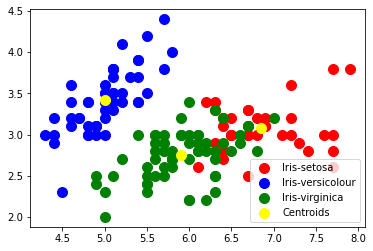

In [13]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


# Thank you